# Finding Donors for Charity || Supervised Learning

### This data is collected from 1994 US Census has been preserved by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) .



* The dataset contains several categories regarding an adult like Age , workclass , education , marital-status, sex , race ,native-country and income.


* The purpose of this project is to explore the dataset through its various features and apply machine learning algorithm to predict those who earn greater than 50K.


* The reason is ,Non profit organisations like to find people who will be able to donate.


* The dataset for this project originates from the UCI Machine Learning Repository. The datset was donated by Ron Kohavi and Barry Becker, after being published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid". You can find the article by Ron Kohavi online. The data we investigate here consists of small changes to the original dataset, such as removing the 'fnlwgt' feature and records with missing or ill-formatted entries.


In [1]:
# Importing libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing dataset for analysis using pandas "read_csv" method.
df = pd.read_csv('census_donors.csv' , delimiter = ',', header = 0 ,skipinitialspace = True)
df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [3]:
# printing the shape of the dataset. We can see that it has more than 45k rows(45222 to be exact) and 14 columns.
df.shape

(45222, 14)

In [4]:
# printing the features
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Featureset Exploration

* **age**: continuous.

* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* **education-num**: continuous.

* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.

* **sex**: Female, Male.

* **capital-gain**: continuous.

* **capital-loss**: continuous.

* **hours-per-week**: continuous.

* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, 
France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [5]:
# Creating a dictionary to describe the dataset like missing value,datatype,unique value and count.
def descriptive_analysis(df):
    Data_dict = pd.DataFrame(df.dtypes)
    Data_dict['MissingVal'] = df.isnull().sum()
    Data_dict['UniqueVal'] = df.nunique()
    Data_dict['Count'] = df.count()
    Data_dict = Data_dict.rename(columns = {0:'DataType'})
    return Data_dict

In [6]:
Data_dict = descriptive_analysis(df)

In [7]:
Data_dict

,DataType,MissingVal,UniqueVal,Count
age,int64,0,74,45222
workclass,object,0,7,45222
education_level,object,0,16,45222
education-num,float64,0,16,45222
marital-status,object,0,7,45222
occupation,object,0,14,45222
relationship,object,0,6,45222
race,object,0,5,45222
sex,object,0,2,45222
capital-gain,float64,0,121,45222


In [8]:
# printing the target labels .The dataset contains atleast 34k entries of people earning less than 50k and just over 11k entries of people earning more than 50k.
df.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [9]:
# distributions of two groups 
less_than_50K = df.income.value_counts()[0]/len(df.income)
greater_than_50K = df.income.value_counts()[1]/len(df.income)
print('Less than 50K: {} , Greater than 50K: {}'.format(less_than_50K,greater_than_50K))

Less than 50K: 0.7521560302507629 , Greater than 50K: 0.2478439697492371


### Univariate Data Analysis

c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'densit

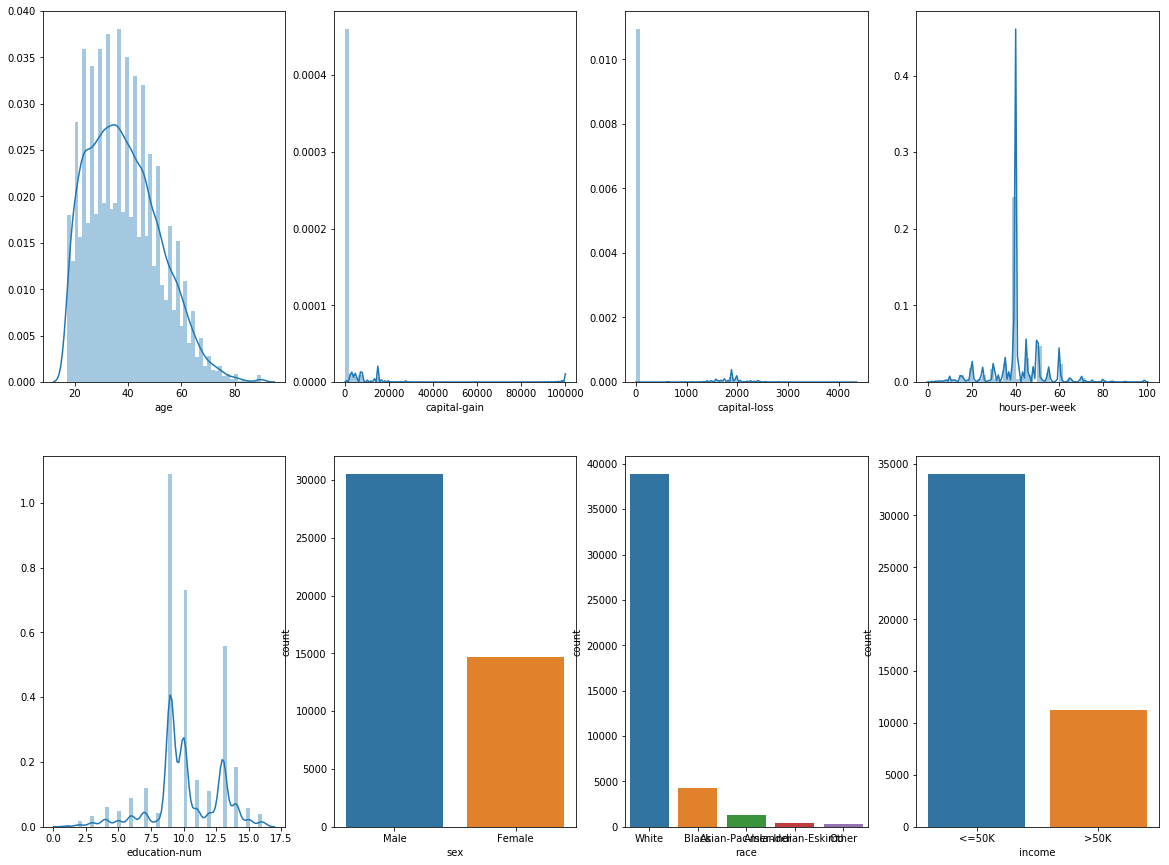

In [14]:
fig , axes = plt.subplots(2, 4, figsize = (20,15) )
sns.distplot(df['age'] , kde = True , ax = axes[0,0])
sns.distplot(df['capital-gain'] , kde = True , ax = axes[0,1])
sns.distplot(df['capital-loss'] , kde = True , ax = axes[0,2])
sns.distplot(df['hours-per-week'] , kde = True , ax = axes[0,3])
sns.distplot(df['education-num'] , kde = True , ax = axes[1,0])
sns.countplot('sex' , data = df, ax = axes[1,1])
sns.countplot('race' , data = df, ax = axes[1,2])
sns.countplot('income' , data = df, ax = axes[1,3])

In [24]:
# gender distribution in the dataset
df.sex.value_counts()

Male      30527
Female    14695
Name: sex, dtype: int64

In [19]:
#income distribution among 'Male' in the dataset
df[df['sex']=='Male'].income.value_counts()

<=50K    20988
>50K      9539
Name: income, dtype: int64

In [23]:
#income distribution among 'Female' in the dataset
df[df['sex']=='Female'].income.value_counts()

<=50K    13026
>50K      1669
Name: income, dtype: int64

In [29]:
# income camparison among the same genders
high_income_female_percentage = df[df['sex']=='Female'].income.value_counts()[1]/df.sex.value_counts()[1]*100
high_income_Male_percentage = df[df['sex']=='Male'].income.value_counts()[1]/df.sex.value_counts()[0]*100
print('{:.2f} out of 100 women earns more than 50K'.format(high_income_female_percentage))
print('{:.2f} out of 100 men earns more than 50K'.format(high_income_Male_percentage))

11.36 out of 100 women earns more than 50K
31.25 out of 100 men earns more than 50K


In [31]:
# income camparison between genders 
female_income_percentage = df[df['sex']=='Female'].income.value_counts()[1]/len(df)*100
male_income_percentage = df[df['sex']=='Male'].income.value_counts()[1]/len(df)*100
print('{:.2f} out of 100 people earns more than 50K'.format(female_income_percentage))
print('{:.2f} out of 100 people earns more than 50K'.format(male_income_percentage))

3.69 out of 100 people earns more than 50K
21.09 out of 100 people earns more than 50K


### Multivariate Data Analysis

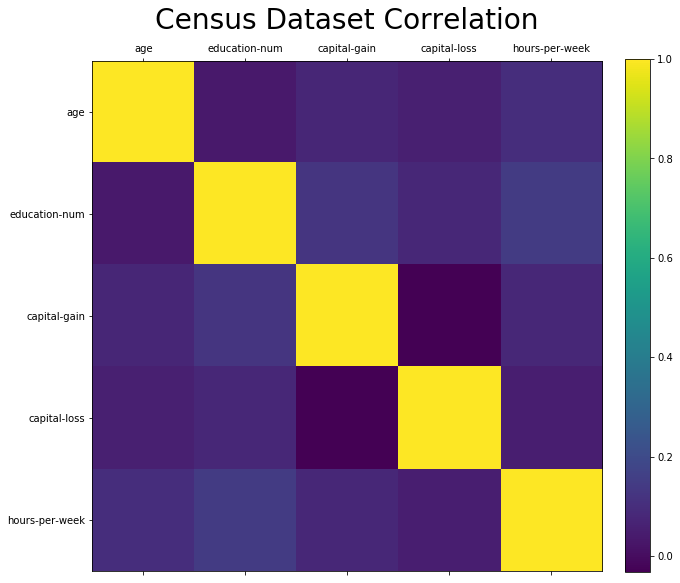

In [13]:
#plotting the correlation matrix
def plotting_corr(df , size = 10):
    corr = df.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Census Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(df , size = 10)

* education-num and hours-per-week slightly positively correlated.
* capital-gain and education-num is positively correlated.

### Preparing the dataset


In [14]:
# transforming the income labels to 0 and 1 . '0' for entries <50k and '1' for entries >50k.
df['income'] = df['income'].map(lambda x : 1 if x=='>50K' else 0)
df.income.value_counts()

0    34014
1    11208
Name: income, dtype: int64

* **Looking at the ''capital-gain'' and "capital-loss" graph above it appears that distribution is skewed . Now what happens is sometimes a dataset may contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: 'capital-gain' and 'capital-loss'.**

In [228]:
# method for feature scaling or Normalisation
def feature_scaling(df):
        df-=df.min()
        df/=df.max()
        return df

In [229]:
# feature scale to all the numerical features
df['capital-gain'] = feature_scaling(df['capital-gain'])
df['capital-loss'] = feature_scaling(df['capital-loss'])


In [230]:
df['age'] = feature_scaling(df['age'])
df['education-num'] = feature_scaling(df['education-num'])
df['hours-per-week'] = feature_scaling(df['hours-per-week'])

In [231]:
# dataframe after feature scaling
df.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,0
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,0
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,0
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,0
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States,0
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica,0
7,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States,1
8,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.140841,0.0,0.500000,United-States,1
9,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.051781,0.0,0.397959,United-States,1


In [232]:
#spliting the labels and features 
labels = df['income']
features = df.drop('income', axis = 1)

In [233]:
features.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

* From the table in above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One way to convert categorical variables is by using the pd.get_dummies method. get_dummies method creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

                |     |someFeature|     |someFeature_A|someFeature_B|someFeature_C|
                |-----|-----------|-----|-------------|------------ |-------------|
                |1    |A          |     |1            |0            |0            |
                |2    |B          |     |0            |1            |0            |
                |3    |C          |     |0            |0            |1            |

In [234]:
# tranforming catagorical features in numerical features .
encoded_features = pd.get_dummies(features)
encoded_features.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=103)

### Machine Learning

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(encoded_features,labels, test_size=0.33, random_state=42)

### Random Forrest

In [236]:
# Applying Random Forrest Classifier
clf = RandomForestClassifier(n_estimators = 50 , max_features = 'sqrt')
clf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [237]:
# poping out the most contributing features in our classification using "features_importances_"
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

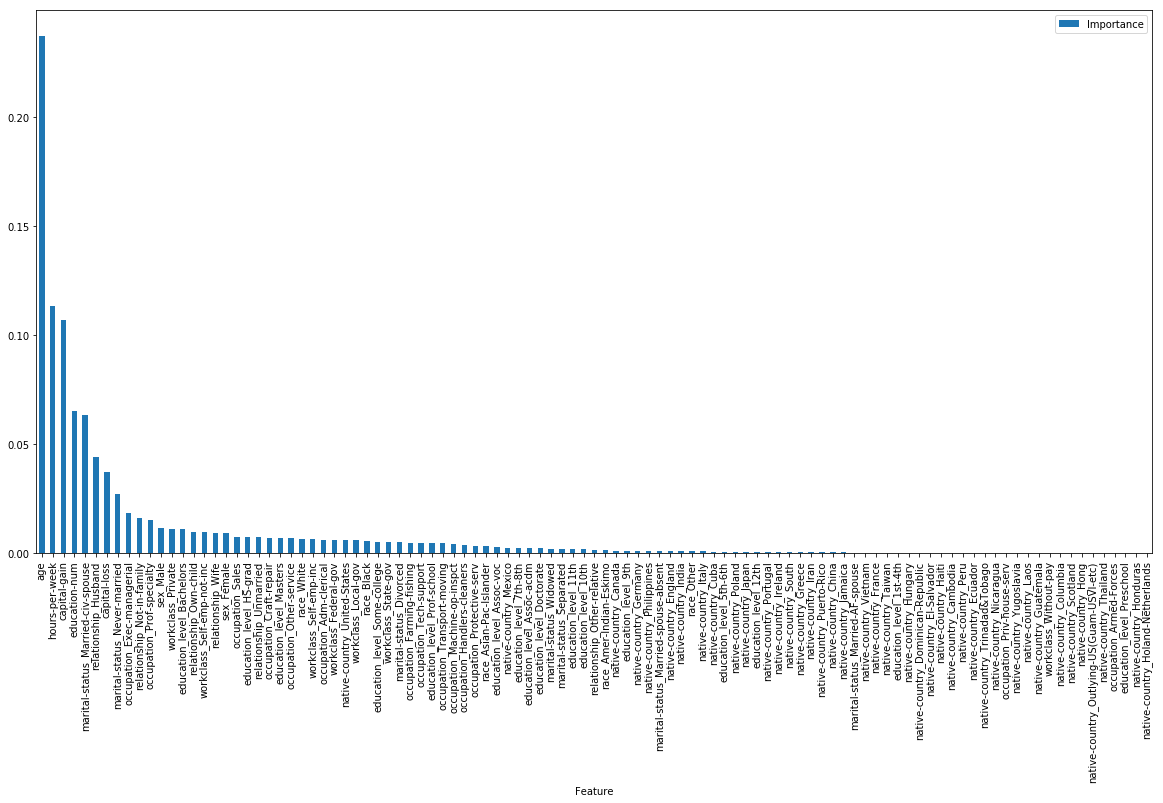

In [238]:
features.plot(kind='bar', figsize=(20, 10))

In [239]:
# extracting the top 15 features contributing to the classifier 
model = SelectFromModel(clf , prefit = True)
X_train_new = model.transform(X_train)
X_train_new.shape

(30298, 15)

In [240]:
X_test_new = model.transform(X_test)
X_test_new.shape

(14924, 15)

In [241]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [242]:
# extracting the predictions
predictions = model.predict(X_test)

In [243]:
from sklearn.metrics import classification_report,recall_score,roc_curve,roc_auc_score

In [244]:
#printing the classification report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.96      0.90     11216
          1       0.80      0.50      0.61      3708

avg / total       0.84      0.84      0.83     14924




--------------Plotting_AUC_ROC_Curve--------------------------------


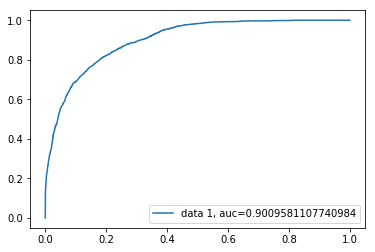

In [245]:
print("\n--------------Plotting_AUC_ROC_Curve--------------------------------")
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Linear SVC

In [246]:
from sklearn.svm import LinearSVC

svc_clf = LinearSVC(C = 0.01 , penalty='l1' , dual = False)
svc_clf.fit(X_train ,y_train)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [247]:
model = SelectFromModel(svc_clf , prefit = True)
train_new = model.transform(X_train)
train_new.shape

(30298, 28)

In [248]:
test_new = model.transform(X_test)
test_new.shape

(14924, 28)

In [249]:
parameters = {'C': 0.01 ,
              'penalty' : 'l1' ,
              'dual' : False ,
              'fit_intercept' : True ,
              'intercept_scaling' : 1,
              'loss' : 'squared_hinge' ,
              'max_iter' : 1000,
              'multi_class' : 'ovr' ,
              'penalty' : 'l1' ,
              'random_state' : None ,
              'tol': 0.0001 ,
              'verbose' : 0}
model = LinearSVC(**parameters)
model.fit(X_train ,y_train)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [250]:
predictions = model.predict(X_test)

In [251]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.86      0.94      0.90     11216
          1       0.76      0.55      0.64      3708

avg / total       0.84      0.85      0.84     14924



### K Neighbours Classifier

In [253]:
from sklearn.neighbors import KNeighborsClassifier

Knn_clf = KNeighborsClassifier(n_neighbors = 3)
Knn_clf.fit(X_train ,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [254]:
model = SelectFromModel(svc_clf , prefit = True)
train_new = model.transform(X_train)
train_new.shape


(30298, 28)

In [255]:
test_new = model.transform(X_test)
test_new.shape

(14924, 28)

In [257]:
predictions = Knn_clf.predict(X_test)


In [258]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.86      0.89      0.88     11216
          1       0.64      0.57      0.60      3708

avg / total       0.81      0.81      0.81     14924

